In [ ]:
import globglob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
imporglobckle
from tqdm import tqdm
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, Activation, Flatten
from keras.optimizers import Adam, RMSprop
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
import nltk

In [ ]:
bishop_imgs = glob.glob('/content/Bishop/*.jpg')

In [ ]:
def preprocess_input(x):
  x=(x/255.0-0.5)*2
  return x

In [ ]:
def preprocess(image_path):
  img = image.load_img(image_path, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

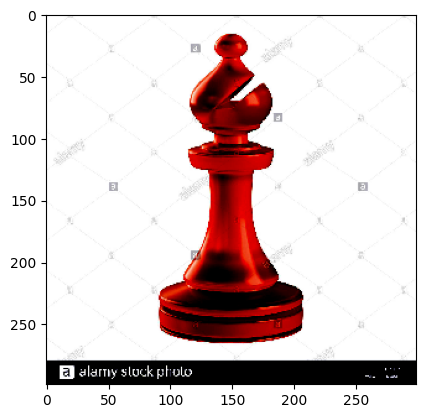

In [ ]:
plt.imshow(np.squeeze(preprocess(bishop_imgs[0])))

In [ ]:
model = InceptionV3(weights='imagenet')

In [ ]:
from keras.models import Model

# taking input layer
new_input = model.input

# taking the 2nd last layer
hidden_layer = model.layers[-2].output

# modifying the existing Inception model to meet our needs
model_new = Model(new_input, hidden_layer)

In [ ]:
#encoding function
def encode(image):
  im=model_new.predict(preprocess(image))
  img=im.reshape(im.shape[1],)
  return img

In [ ]:
encoding_bishop_train = []
for img in tqdm(bishop_imgs):
    encoding_bishop_train.append(encode(img))

  0%|          | 0/71 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  1%|▏         | 1/71 [00:01<02:08,  1.84s/it]

1/1 [==============================] - 0s 234ms/step


  3%|▎         | 2/71 [00:02<01:04,  1.07it/s]

1/1 [==============================] - 0s 250ms/step


  4%|▍         | 3/71 [00:02<00:44,  1.52it/s]

1/1 [==============================] - 0s 256ms/step


  6%|▌         | 4/71 [00:02<00:35,  1.89it/s]

1/1 [==============================] - 0s 230ms/step


  7%|▋         | 5/71 [00:03<00:29,  2.25it/s]

1/1 [==============================] - 0s 241ms/step


  8%|▊         | 6/71 [00:03<00:27,  2.34it/s]

1/1 [==============================] - 0s 253ms/step


 10%|▉         | 7/71 [00:03<00:25,  2.51it/s]

1/1 [==============================] - 0s 242ms/step


 11%|█▏        | 8/71 [00:04<00:23,  2.69it/s]

1/1 [==============================] - 0s 240ms/step


 13%|█▎        | 9/71 [00:04<00:23,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


 14%|█▍        | 10/71 [00:04<00:21,  2.78it/s]

1/1 [==============================] - 0s 235ms/step


 15%|█▌        | 11/71 [00:05<00:20,  2.92it/s]

1/1 [==============================] - 0s 247ms/step


 17%|█▋        | 12/71 [00:05<00:20,  2.81it/s]

1/1 [==============================] - 0s 414ms/step


 18%|█▊        | 13/71 [00:06<00:27,  2.08it/s]

1/1 [==============================] - 0s 439ms/step


 20%|█▉        | 14/71 [00:07<00:32,  1.76it/s]

1/1 [==============================] - 0s 382ms/step


 21%|██        | 15/71 [00:07<00:35,  1.58it/s]

1/1 [==============================] - 0s 244ms/step


 23%|██▎       | 16/71 [00:08<00:31,  1.77it/s]

1/1 [==============================] - 0s 256ms/step


 24%|██▍       | 17/71 [00:08<00:26,  2.02it/s]

1/1 [==============================] - 0s 247ms/step


 25%|██▌       | 18/71 [00:08<00:23,  2.25it/s]

1/1 [==============================] - 0s 250ms/step


 27%|██▋       | 19/71 [00:09<00:22,  2.31it/s]

1/1 [==============================] - 0s 251ms/step


 28%|██▊       | 20/71 [00:09<00:20,  2.50it/s]

1/1 [==============================] - 0s 272ms/step


 30%|██▉       | 21/71 [00:10<00:20,  2.50it/s]

1/1 [==============================] - 0s 237ms/step


 31%|███       | 22/71 [00:10<00:18,  2.69it/s]

1/1 [==============================] - 0s 244ms/step


 32%|███▏      | 23/71 [00:10<00:18,  2.62it/s]

1/1 [==============================] - 0s 255ms/step


 34%|███▍      | 24/71 [00:11<00:17,  2.71it/s]

1/1 [==============================] - 0s 242ms/step


 35%|███▌      | 25/71 [00:11<00:16,  2.80it/s]

1/1 [==============================] - 0s 259ms/step


 37%|███▋      | 26/71 [00:11<00:16,  2.69it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 27/71 [00:12<00:15,  2.80it/s]

1/1 [==============================] - 0s 238ms/step


 39%|███▉      | 28/71 [00:12<00:15,  2.70it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████      | 29/71 [00:12<00:15,  2.66it/s]

1/1 [==============================] - 0s 258ms/step


 42%|████▏     | 30/71 [00:13<00:15,  2.63it/s]

1/1 [==============================] - 0s 239ms/step


 44%|████▎     | 31/71 [00:13<00:14,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 45%|████▌     | 32/71 [00:13<00:13,  2.87it/s]

1/1 [==============================] - 0s 258ms/step


 46%|████▋     | 33/71 [00:14<00:13,  2.73it/s]

1/1 [==============================] - 0s 245ms/step


 48%|████▊     | 34/71 [00:14<00:13,  2.84it/s]

1/1 [==============================] - 0s 239ms/step


 49%|████▉     | 35/71 [00:15<00:12,  2.95it/s]

1/1 [==============================] - 0s 248ms/step


 51%|█████     | 36/71 [00:15<00:12,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 37/71 [00:15<00:12,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▎    | 38/71 [00:16<00:12,  2.69it/s]

1/1 [==============================] - 0s 239ms/step


 55%|█████▍    | 39/71 [00:16<00:11,  2.83it/s]

1/1 [==============================] - 0s 236ms/step


 56%|█████▋    | 40/71 [00:16<00:11,  2.73it/s]

1/1 [==============================] - 0s 244ms/step


 58%|█████▊    | 41/71 [00:17<00:10,  2.85it/s]

1/1 [==============================] - 0s 241ms/step


 59%|█████▉    | 42/71 [00:17<00:09,  2.92it/s]

1/1 [==============================] - 0s 407ms/step


 61%|██████    | 43/71 [00:18<00:13,  2.14it/s]

1/1 [==============================] - 0s 442ms/step


 62%|██████▏   | 44/71 [00:19<00:14,  1.81it/s]

1/1 [==============================] - 0s 394ms/step


 63%|██████▎   | 45/71 [00:19<00:15,  1.64it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████▍   | 46/71 [00:20<00:13,  1.92it/s]

1/1 [==============================] - 0s 244ms/step


 66%|██████▌   | 47/71 [00:20<00:11,  2.13it/s]

1/1 [==============================] - 0s 239ms/step


 68%|██████▊   | 48/71 [00:20<00:09,  2.36it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▉   | 49/71 [00:21<00:08,  2.56it/s]

1/1 [==============================] - 0s 253ms/step


 70%|███████   | 50/71 [00:21<00:08,  2.57it/s]

1/1 [==============================] - 0s 237ms/step


 72%|███████▏  | 51/71 [00:21<00:07,  2.65it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 52/71 [00:22<00:07,  2.62it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▍  | 53/71 [00:22<00:06,  2.61it/s]

1/1 [==============================] - 0s 236ms/step


 76%|███████▌  | 54/71 [00:22<00:06,  2.58it/s]

1/1 [==============================] - 0s 235ms/step


 77%|███████▋  | 55/71 [00:23<00:05,  2.76it/s]

1/1 [==============================] - 0s 272ms/step


 79%|███████▉  | 56/71 [00:23<00:05,  2.69it/s]

1/1 [==============================] - 0s 240ms/step


 80%|████████  | 57/71 [00:23<00:04,  2.82it/s]

1/1 [==============================] - 0s 236ms/step


 82%|████████▏ | 58/71 [00:24<00:04,  2.94it/s]

1/1 [==============================] - 0s 265ms/step


 83%|████████▎ | 59/71 [00:24<00:04,  2.82it/s]

1/1 [==============================] - 0s 243ms/step


 85%|████████▍ | 60/71 [00:25<00:03,  2.91it/s]

1/1 [==============================] - 0s 235ms/step


 86%|████████▌ | 61/71 [00:25<00:03,  3.00it/s]

1/1 [==============================] - 0s 255ms/step


 87%|████████▋ | 62/71 [00:25<00:02,  3.03it/s]

1/1 [==============================] - 0s 241ms/step


 89%|████████▊ | 63/71 [00:26<00:02,  2.86it/s]

1/1 [==============================] - 0s 238ms/step


 90%|█████████ | 64/71 [00:26<00:02,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


 92%|█████████▏| 65/71 [00:26<00:02,  2.53it/s]

1/1 [==============================] - 0s 243ms/step


 93%|█████████▎| 66/71 [00:27<00:02,  2.46it/s]

1/1 [==============================] - 0s 271ms/step


 94%|█████████▍| 67/71 [00:27<00:01,  2.49it/s]

1/1 [==============================] - 0s 240ms/step


 96%|█████████▌| 68/71 [00:28<00:01,  2.51it/s]

1/1 [==============================] - 0s 235ms/step


 97%|█████████▋| 69/71 [00:28<00:00,  2.67it/s]

1/1 [==============================] - 0s 258ms/step


 99%|█████████▊| 70/71 [00:28<00:00,  2.77it/s]

1/1 [==============================] - 0s 242ms/step


100%|██████████| 71/71 [00:29<00:00,  2.44it/s]


In [ ]:
encoding_bishop_test = []
for img in tqdm(bishop_imgs):
    encoding_bishop_test.append((encode(img)))

  0%|          | 0/71 [00:00<?, ?it/s]

1/1 [==============================] - 0s 234ms/step


  1%|▏         | 1/71 [00:00<00:27,  2.56it/s]

1/1 [==============================] - 0s 413ms/step


  3%|▎         | 2/71 [00:01<00:40,  1.71it/s]

1/1 [==============================] - 0s 428ms/step


  4%|▍         | 3/71 [00:01<00:44,  1.51it/s]

1/1 [==============================] - 0s 391ms/step


  6%|▌         | 4/71 [00:02<00:39,  1.68it/s]

1/1 [==============================] - 0s 268ms/step


  7%|▋         | 5/71 [00:02<00:35,  1.85it/s]

1/1 [==============================] - 0s 236ms/step


  8%|▊         | 6/71 [00:03<00:31,  2.04it/s]

1/1 [==============================] - 0s 242ms/step


 10%|▉         | 7/71 [00:03<00:29,  2.15it/s]

1/1 [==============================] - 0s 235ms/step


 11%|█▏        | 8/71 [00:04<00:27,  2.26it/s]

1/1 [==============================] - 0s 245ms/step


 13%|█▎        | 9/71 [00:04<00:26,  2.33it/s]

1/1 [==============================] - 0s 257ms/step


 14%|█▍        | 10/71 [00:04<00:24,  2.51it/s]

1/1 [==============================] - 0s 238ms/step


 15%|█▌        | 11/71 [00:05<00:23,  2.53it/s]

1/1 [==============================] - 0s 234ms/step


 17%|█▋        | 12/71 [00:05<00:23,  2.55it/s]

1/1 [==============================] - 0s 254ms/step


 18%|█▊        | 13/71 [00:05<00:21,  2.70it/s]

1/1 [==============================] - 0s 231ms/step


 20%|█▉        | 14/71 [00:06<00:20,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


 21%|██        | 15/71 [00:06<00:20,  2.73it/s]

1/1 [==============================] - 0s 247ms/step


 23%|██▎       | 16/71 [00:06<00:20,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██▍       | 17/71 [00:07<00:19,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


 25%|██▌       | 18/71 [00:07<00:18,  2.87it/s]

1/1 [==============================] - 0s 253ms/step


 27%|██▋       | 19/71 [00:07<00:17,  2.89it/s]

1/1 [==============================] - 0s 236ms/step


 28%|██▊       | 20/71 [00:08<00:18,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 30%|██▉       | 21/71 [00:08<00:17,  2.88it/s]

1/1 [==============================] - 0s 254ms/step


 31%|███       | 22/71 [00:08<00:16,  2.93it/s]

1/1 [==============================] - 0s 238ms/step


 32%|███▏      | 23/71 [00:09<00:17,  2.77it/s]

1/1 [==============================] - 0s 244ms/step


 34%|███▍      | 24/71 [00:09<00:16,  2.87it/s]

1/1 [==============================] - 0s 252ms/step


 35%|███▌      | 25/71 [00:10<00:15,  2.88it/s]

1/1 [==============================] - 0s 237ms/step


 37%|███▋      | 26/71 [00:10<00:16,  2.78it/s]

1/1 [==============================] - 0s 239ms/step


 38%|███▊      | 27/71 [00:10<00:15,  2.91it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▉      | 28/71 [00:11<00:15,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████      | 29/71 [00:11<00:15,  2.72it/s]

1/1 [==============================] - 0s 241ms/step


 42%|████▏     | 30/71 [00:11<00:15,  2.68it/s]

1/1 [==============================] - 0s 234ms/step


 44%|████▎     | 31/71 [00:12<00:15,  2.63it/s]

1/1 [==============================] - 0s 310ms/step


 45%|████▌     | 32/71 [00:12<00:14,  2.60it/s]

1/1 [==============================] - 0s 429ms/step


 46%|████▋     | 33/71 [00:13<00:18,  2.02it/s]

1/1 [==============================] - 0s 427ms/step


 48%|████▊     | 34/71 [00:14<00:21,  1.73it/s]

1/1 [==============================] - 0s 362ms/step


 49%|████▉     | 35/71 [00:14<00:22,  1.59it/s]

1/1 [==============================] - 0s 252ms/step


 51%|█████     | 36/71 [00:15<00:18,  1.87it/s]

1/1 [==============================] - 0s 245ms/step


 52%|█████▏    | 37/71 [00:15<00:15,  2.13it/s]

1/1 [==============================] - 0s 245ms/step


 54%|█████▎    | 38/71 [00:15<00:14,  2.24it/s]

1/1 [==============================] - 0s 245ms/step


 55%|█████▍    | 39/71 [00:16<00:12,  2.46it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▋    | 40/71 [00:16<00:11,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████▊    | 41/71 [00:16<00:10,  2.80it/s]

1/1 [==============================] - 0s 250ms/step


 59%|█████▉    | 42/71 [00:17<00:10,  2.88it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████    | 43/71 [00:17<00:10,  2.78it/s]

1/1 [==============================] - 0s 237ms/step


 62%|██████▏   | 44/71 [00:17<00:09,  2.90it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 45/71 [00:18<00:08,  2.93it/s]

1/1 [==============================] - 0s 247ms/step


 65%|██████▍   | 46/71 [00:18<00:08,  2.97it/s]

1/1 [==============================] - 0s 239ms/step


 66%|██████▌   | 47/71 [00:19<00:08,  2.75it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 48/71 [00:19<00:08,  2.85it/s]

1/1 [==============================] - 0s 238ms/step


 69%|██████▉   | 49/71 [00:19<00:07,  2.95it/s]

1/1 [==============================] - 0s 236ms/step


 70%|███████   | 50/71 [00:20<00:07,  2.84it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 51/71 [00:20<00:07,  2.72it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 52/71 [00:20<00:07,  2.65it/s]

1/1 [==============================] - 0s 232ms/step


 75%|███████▍  | 53/71 [00:21<00:06,  2.61it/s]

1/1 [==============================] - 0s 241ms/step


 76%|███████▌  | 54/71 [00:21<00:06,  2.76it/s]

1/1 [==============================] - 0s 237ms/step


 77%|███████▋  | 55/71 [00:21<00:05,  2.89it/s]

1/1 [==============================] - 0s 233ms/step


 79%|███████▉  | 56/71 [00:22<00:05,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


 80%|████████  | 57/71 [00:22<00:05,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 82%|████████▏ | 58/71 [00:22<00:04,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


 83%|████████▎ | 59/71 [00:23<00:04,  2.97it/s]

1/1 [==============================] - 0s 245ms/step


 85%|████████▍ | 60/71 [00:23<00:03,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


 86%|████████▌ | 61/71 [00:23<00:03,  3.02it/s]

1/1 [==============================] - 0s 240ms/step


 87%|████████▋ | 62/71 [00:24<00:03,  2.87it/s]

1/1 [==============================] - 0s 252ms/step


 89%|████████▊ | 63/71 [00:24<00:02,  2.87it/s]

1/1 [==============================] - 0s 409ms/step


 90%|█████████ | 64/71 [00:25<00:02,  2.51it/s]

1/1 [==============================] - 0s 436ms/step


 92%|█████████▏| 65/71 [00:25<00:02,  2.14it/s]

1/1 [==============================] - 1s 556ms/step


 93%|█████████▎| 66/71 [00:26<00:02,  1.74it/s]

1/1 [==============================] - 0s 487ms/step


 94%|█████████▍| 67/71 [00:27<00:02,  1.62it/s]

1/1 [==============================] - 0s 417ms/step


 96%|█████████▌| 68/71 [00:27<00:01,  1.68it/s]

1/1 [==============================] - 0s 394ms/step


 97%|█████████▋| 69/71 [00:28<00:01,  1.55it/s]

1/1 [==============================] - 0s 248ms/step


 99%|█████████▊| 70/71 [00:29<00:00,  1.75it/s]

1/1 [==============================] - 0s 235ms/step


100%|██████████| 71/71 [00:29<00:00,  2.42it/s]


In [ ]:
def decode(encoded_representation, model):
    # Reshape the encoded representation
    encoded_representation = encoded_representation.reshape((1, -1))

    # Use the decoder part of the model to obtain the decoded image
    decoded_image = model.predict(encoded_representation)

    return decoded_image
